In [5]:
#mount the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
path = "/content/gdrive/MyDrive/Colab Notebooks/myself/"

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

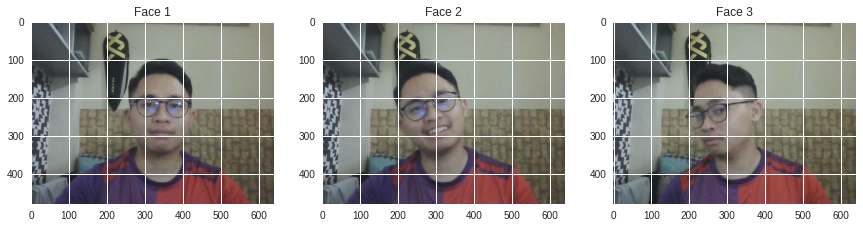

In [38]:
face1 = cv2.imread(path+"face1.jpg")
face2 = cv2.imread(path+"face2.jpg")
face3 = cv2.imread(path+"face3.jpg")

color_coverted1 = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)
color_coverted2 = cv2.cvtColor(face2, cv2.COLOR_BGR2RGB)
color_coverted3 = cv2.cvtColor(face3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(color_coverted1);plt.title("Face 1");
plt.subplot(142);plt.imshow(color_coverted2);plt.title("Face 2");
plt.subplot(143);plt.imshow(color_coverted3);plt.title("Face 3");

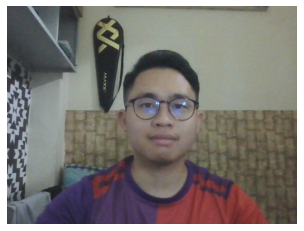

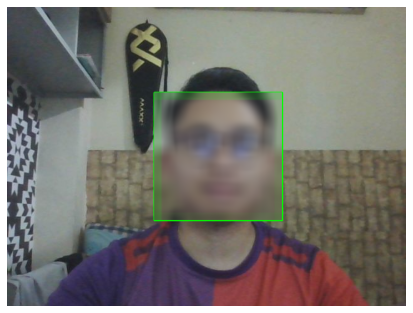

In [9]:
def plotImages(img):
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.style.use('seaborn')
    plt.show()
  
# plotting the original image
plotImages(color_coverted1)

face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
face_data = face_cascade.detectMultiScale(color_coverted1, 1.3, 5)
  
# Draw rectangle around the faces which is our region of interest (ROI)
for (x, y, w, h) in face_data:
    cv2.rectangle(color_coverted1, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi = color_coverted1[y:y+h, x:x+w]
    # applying a gaussian blur over this new rectangle area
    roi = cv2.GaussianBlur(roi, (23, 23), 30)
    # impose this blurred image on original image to get final image
    color_coverted1[y:y+roi.shape[0], x:x+roi.shape[1]] = roi
  
  
# Display the output
plotImages(color_coverted1)

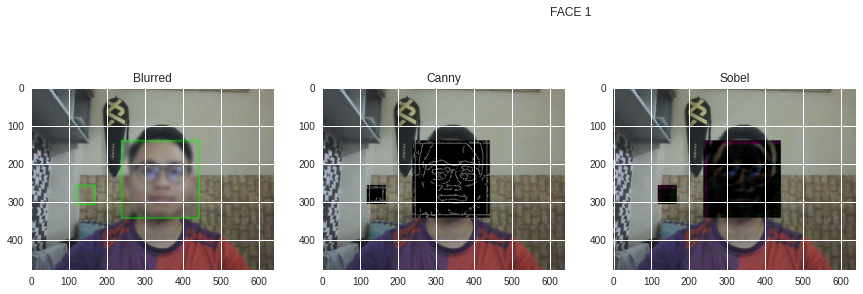

In [36]:
gray1 = cv2.cvtColor(color_coverted1, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray1)
img_copy1 = color_coverted1.copy()
img_blur1 = color_coverted1.copy()
img_sobel1 = color_coverted1.copy()

for (x,y,w,h) in faces:
  img_blur1 = cv2.rectangle (img_blur1, (x,y), (x+w,y+h), (0,255, 0), 2)
  color_coverted1_convolute = cv2.GaussianBlur(img_blur1[y:y+h,x:x+w],(15,15),5)
  img_blur1[y:y+h,x:x+w] = color_coverted1_convolute
  imgCanny1 = cv2. Canny (color_coverted1_convolute, 25, 5)
  imgCanny1 = imgCanny1.reshape ((imgCanny1.shape[0], imgCanny1.shape[1], 1))
  img_copy1[y:y+h,x:x+w]=imgCanny1
  sobelx = cv2. Sobel (color_coverted1_convolute, cv2.CV_8U, 1,0, ksize=3)
  sobely = cv2. Sobel (color_coverted1_convolute, cv2.CV_8U,0,1,ksize=3)
  imgSobel1 = sobelx + sobely
  img_sobel1[y:y+h,x:x+w]=imgSobel1

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(img_blur1);plt.title("Blurred");
plt.subplot(142);plt.imshow(img_copy1);plt.title("Canny");
plt.subplot(143);plt.imshow(img_sobel1);plt.title("Sobel");

plt.suptitle("FACE 1")
plt.show()

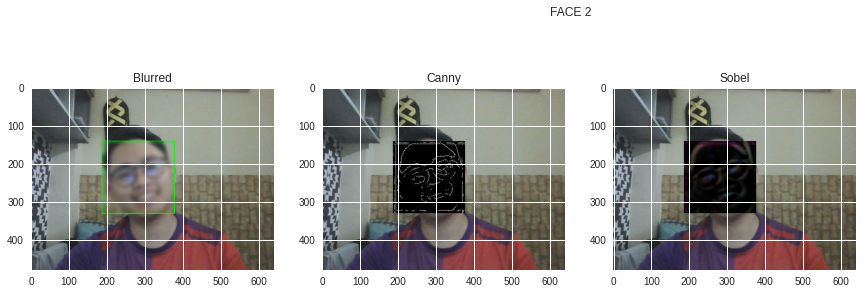

In [27]:
gray1 = cv2.cvtColor(color_coverted2, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray1)
img_copy2 = color_coverted2.copy()
img_blur2 = color_coverted2.copy()
img_sobel2 = color_coverted2.copy()

for (x,y,w,h) in faces:
  img_blur2 = cv2.rectangle (img_blur2, (x,y), (x+w,y+h), (0,255, 0), 2)
  color_coverted2_convolute = cv2.GaussianBlur(img_blur2[y:y+h,x:x+w],(15,15),5)
  img_blur2[y:y+h,x:x+w] = color_coverted2_convolute
  imgCanny2 = cv2.Canny (color_coverted2_convolute, 35, 35)
  imgCanny2 = imgCanny2.reshape ((imgCanny2.shape[0], imgCanny2.shape[1], 1))
  img_copy2[y:y+h,x:x+w]=imgCanny2
  sobelx = cv2.Sobel (color_coverted2_convolute, cv2.CV_8U, 1,0, ksize=3)
  sobely = cv2.Sobel (color_coverted2_convolute, cv2.CV_8U,0,1,ksize=3)
  imgSobel2 = sobelx + sobely
  img_sobel2[y:y+h,x:x+w]=imgSobel2

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(img_blur2);plt.title("Blurred");
plt.subplot(142);plt.imshow(img_copy2);plt.title("Canny");
plt.subplot(143);plt.imshow(img_sobel2);plt.title("Sobel");

plt.suptitle("FACE 2")
plt.show()

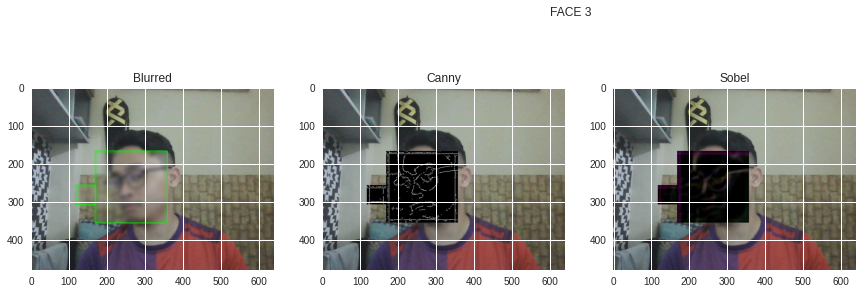

In [32]:
gray3 = cv2.cvtColor(color_coverted3, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray3)
img_copy3 = color_coverted3.copy()
img_blur3 = color_coverted3.copy()
img_sobel3 = color_coverted3.copy()

for (x,y,w,h) in faces:
  img_blur3 = cv2.rectangle (img_blur3, (x,y), (x+w,y+h), (0,255, 0), 2)
  color_coverted3_convolute = cv2.GaussianBlur(img_blur3[y:y+h,x:x+w],(15,15),5)
  img_blur3[y:y+h,x:x+w] = color_coverted3_convolute
  imgCanny3 = cv2.Canny (color_coverted3_convolute, 25, 25)
  imgCanny3 = imgCanny3.reshape ((imgCanny3.shape[0], imgCanny3.shape[1], 1))
  img_copy3[y:y+h,x:x+w]=imgCanny3
  sobelx = cv2.Sobel (color_coverted3_convolute, cv2.CV_8U, 1,0, ksize=3)
  sobely = cv2.Sobel (color_coverted3_convolute, cv2.CV_8U,0,1,ksize=3)
  imgSobel3 = sobelx + sobely
  img_sobel3[y:y+h,x:x+w]=imgSobel3

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(img_blur3);plt.title("Blurred");
plt.subplot(142);plt.imshow(img_copy3);plt.title("Canny");
plt.subplot(143);plt.imshow(img_sobel3);plt.title("Sobel");

plt.suptitle("FACE 3")
plt.show()

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

  from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

#mount the google drive
from google.colab import drive
drive.mount('/content/gdrive')
path = "/content/gdrive/MyDrive/Colab Notebooks/myself/"

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

face1 = cv2.imread(path+"face1.jpg")
face2 = cv2.imread(path+"face2.jpg")
face3 = cv2.imread(path+"face3.jpg")

color_coverted1 = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)
color_coverted2 = cv2.cvtColor(face2, cv2.COLOR_BGR2RGB)
color_coverted3 = cv2.cvtColor(face3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(color_coverted1);plt.title("Face 1");
plt.subplot(142);plt.imshow(color_coverted2);plt.title("Face 2");
plt.subplot(143);plt.imshow(color_coverted3);plt.title("Face 3");

gray1 = cv2.cvtColor(color_coverted1, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray1)
img_copy1 = color_coverted1.copy()
img_blur1 = color_coverted1.copy()
img_sobel1 = color_coverted1.copy()

for (x,y,w,h) in faces:
  img_blur1 = cv2.rectangle (img_blur1, (x,y), (x+w,y+h), (0,255, 0), 2)
  color_coverted1_convolute = cv2.GaussianBlur(img_blur1[y:y+h,x:x+w],(15,15),5)
  img_blur1[y:y+h,x:x+w] = color_coverted1_convolute
  imgCanny1 = cv2. Canny (color_coverted1_convolute, 25, 5)
  imgCanny1 = imgCanny1.reshape ((imgCanny1.shape[0], imgCanny1.shape[1], 1))
  img_copy1[y:y+h,x:x+w]=imgCanny1
  sobelx = cv2. Sobel (color_coverted1_convolute, cv2.CV_8U, 1,0, ksize=3)
  sobely = cv2. Sobel (color_coverted1_convolute, cv2.CV_8U,0,1,ksize=3)
  imgSobel1 = sobelx + sobely
  img_sobel1[y:y+h,x:x+w]=imgSobel1

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(img_blur1);plt.title("Blurred");
plt.subplot(142);plt.imshow(img_copy1);plt.title("Canny");
plt.subplot(143);plt.imshow(img_sobel1);plt.title("Sobel");

plt.suptitle("FACE 1")
plt.show()

gray1 = cv2.cvtColor(color_coverted2, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray1)
img_copy2 = color_coverted2.copy()
img_blur2 = color_coverted2.copy()
img_sobel2 = color_coverted2.copy()

for (x,y,w,h) in faces:
  img_blur2 = cv2.rectangle (img_blur2, (x,y), (x+w,y+h), (0,255, 0), 2)
  color_coverted2_convolute = cv2.GaussianBlur(img_blur2[y:y+h,x:x+w],(15,15),5)
  img_blur2[y:y+h,x:x+w] = color_coverted2_convolute
  imgCanny2 = cv2.Canny (color_coverted2_convolute, 35, 35)
  imgCanny2 = imgCanny2.reshape ((imgCanny2.shape[0], imgCanny2.shape[1], 1))
  img_copy2[y:y+h,x:x+w]=imgCanny2
  sobelx = cv2.Sobel (color_coverted2_convolute, cv2.CV_8U, 1,0, ksize=3)
  sobely = cv2.Sobel (color_coverted2_convolute, cv2.CV_8U,0,1,ksize=3)
  imgSobel2 = sobelx + sobely
  img_sobel2[y:y+h,x:x+w]=imgSobel2

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(img_blur2);plt.title("Blurred");
plt.subplot(142);plt.imshow(img_copy2);plt.title("Canny");
plt.subplot(143);plt.imshow(img_sobel2);plt.title("Sobel");

plt.suptitle("FACE 2")
plt.show()

gray3 = cv2.cvtColor(color_coverted3, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray3)
img_copy3 = color_coverted3.copy()
img_blur3 = color_coverted3.copy()
img_sobel3 = color_coverted3.copy()

for (x,y,w,h) in faces:
  img_blur3 = cv2.rectangle (img_blur3, (x,y), (x+w,y+h), (0,255, 0), 2)
  color_coverted3_convolute = cv2.GaussianBlur(img_blur3[y:y+h,x:x+w],(15,15),5)
  img_blur3[y:y+h,x:x+w] = color_coverted3_convolute
  imgCanny3 = cv2.Canny (color_coverted3_convolute, 25, 25)
  imgCanny3 = imgCanny3.reshape ((imgCanny3.shape[0], imgCanny3.shape[1], 1))
  img_copy3[y:y+h,x:x+w]=imgCanny3
  sobelx = cv2.Sobel (color_coverted3_convolute, cv2.CV_8U, 1,0, ksize=3)
  sobely = cv2.Sobel (color_coverted3_convolute, cv2.CV_8U,0,1,ksize=3)
  imgSobel3 = sobelx + sobely
  img_sobel3[y:y+h,x:x+w]=imgSobel3

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(img_blur3);plt.title("Blurred");
plt.subplot(142);plt.imshow(img_copy3);plt.title("Canny");
plt.subplot(143);plt.imshow(img_sobel3);plt.title("Sobel");

plt.suptitle("FACE 3")
plt.show()